In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [3]:
batch_size = 128
num_classes = 10
epochs = 20

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

In [75]:
early_stopping = EarlyStopping(monitor='val_loss', patience=1, verbose=1)
checkpoint = ModelCheckpoint('weights.hdf5', verbose=1, save_best_only=True)

model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data=(x_valid, y_valid),
         callbacks=[early_stopping, checkpoint])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 214s - loss: 0.1787 - acc: 0.9472 - val_loss: 0.0581 - val_acc: 0.9842
Epoch 2/20
48000/48000 [==============================] - 219s - loss: 0.0493 - acc: 0.9849 - val_loss: 0.0459 - val_acc: 0.9857
Epoch 3/20
48000/48000 [==============================] - 222s - loss: 0.0306 - acc: 0.9902 - val_loss: 0.0446 - val_acc: 0.9868
Epoch 4/20
48000/48000 [==============================] - 224s - loss: 0.0204 - acc: 0.9933 - val_loss: 0.0368 - val_acc: 0.9884
Epoch 5/20
48000/48000 [==============================] - 224s - loss: 0.0129 - acc: 0.9958 - val_loss: 0.0406 - val_acc: 0.9891
Epoch 6/20
48000/48000 [==============================] - 223s - loss: 0.0114 - acc: 0.9963 - val_loss: 0.0397 - val_acc: 0.9883
Epoch 00005: early stopping


In [8]:
model.load_weights('weights.hdf5')
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

 9984/10000 [============================>.] - ETA: 0sTest loss: 0.0378945280337
Test accuracy: 0.9873


In [30]:
from vis.visualization import visualize_activation, overlay
from vis.utils import utils
from keras import activations

from matplotlib import pyplot as plt
%matplotlib inline

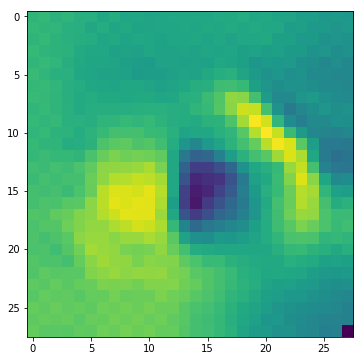

In [31]:
plt.rcParams['figure.figsize'] = (18, 6)
layer_idx = -1
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

filter_idx = 0
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
plt.imshow(img[..., 0])

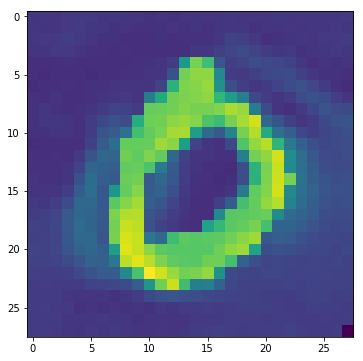

In [88]:
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.))
plt.imshow(overlay(img[..., 0],x_test[np.argmax(y_test, axis=1)==0][0].reshape(28,28)))

Iteration: 1, named_losses: <zip object at 0x000001E89A817B48>, overall loss: 0.7484550476074219
Iteration: 2, named_losses: <zip object at 0x000001E89E76FE08>, overall loss: 534.2507934570312
Iteration: 3, named_losses: <zip object at 0x000001E89D0ACF08>, overall loss: 18.616226196289062
Iteration: 4, named_losses: <zip object at 0x000001E89A817B48>, overall loss: -49.46513366699219
Iteration: 5, named_losses: <zip object at 0x000001E89E76FE08>, overall loss: -127.48297119140625
Iteration: 6, named_losses: <zip object at 0x000001E89D0ACF08>, overall loss: -205.36264038085938
Iteration: 7, named_losses: <zip object at 0x000001E89A817B48>, overall loss: -273.89752197265625
Iteration: 8, named_losses: <zip object at 0x000001E89E76FE08>, overall loss: -317.476806640625
Iteration: 9, named_losses: <zip object at 0x000001E89D0ACF08>, overall loss: -356.70147705078125
Iteration: 10, named_losses: <zip object at 0x000001E89A817B48>, overall loss: -384.7062072753906
Iteration: 11, named_losses

Iteration: 122, named_losses: <zip object at 0x000001E88FA0AA48>, overall loss: -727.5543823242188
Iteration: 123, named_losses: <zip object at 0x000001E89D0ACEC8>, overall loss: -722.2567749023438
Iteration: 124, named_losses: <zip object at 0x000001E89E7C0988>, overall loss: -727.6338500976562
Iteration: 125, named_losses: <zip object at 0x000001E88FA0AA48>, overall loss: -722.430908203125
Iteration: 126, named_losses: <zip object at 0x000001E89E7C0948>, overall loss: -727.8079833984375
Iteration: 127, named_losses: <zip object at 0x000001E89E7C0988>, overall loss: -722.765380859375
Iteration: 128, named_losses: <zip object at 0x000001E88FA0AA48>, overall loss: -728.3928833007812
Iteration: 129, named_losses: <zip object at 0x000001E89E7C0948>, overall loss: -722.956298828125
Iteration: 130, named_losses: <zip object at 0x000001E89D0ACEC8>, overall loss: -728.273681640625
Iteration: 131, named_losses: <zip object at 0x000001E88FA0AA48>, overall loss: -723.018310546875
Iteration: 132,

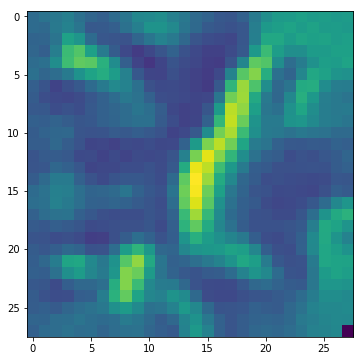

In [21]:
img = visualize_activation(model, layer_idx, filter_indices=filter_idx, input_range=(0., 1.), verbose=True)
plt.imshow(img[..., 0])